In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_pickle('../data/cus_concat_res_entr_checkout')
df

,customer_no,location
timestamp,,
2019-09-04 06:59:00,1,entrance
2019-09-04 07:00:00,1,fruit
2019-09-04 07:01:00,1,fruit
2019-09-04 07:02:00,1,checkout
2019-09-04 06:59:00,2,entrance
...,...,...
2019-09-06 21:50:00,7444,drinks
2019-09-06 21:51:00,7444,checkout
2019-09-06 21:49:00,7445,entrance


In [3]:
df_ent = df[df['location'] == 'entrance']


In [4]:
df_ent

,customer_no,location
timestamp,,
2019-09-04 06:59:00,1,entrance
2019-09-04 06:59:00,2,entrance
2019-09-04 06:59:00,3,entrance
2019-09-04 06:59:00,4,entrance
2019-09-04 06:59:00,5,entrance
...,...,...
2019-09-06 21:47:00,7441,entrance
2019-09-06 21:47:00,7442,entrance
2019-09-06 21:47:00,7443,entrance


In [7]:
df_time = df_ent.groupby('timestamp')[['customer_no']].count()


In [11]:
df_time.rename(columns={'customer_no':'number_of_customer'}, inplace=True)


In [12]:
df_time['hour'] = df_time.index.hour
df_time['minute'] = df_time.index.minute


In [13]:
df_time

,number_of_customer,hour,minute
timestamp,,,
2019-09-02 07:02:00,2,7,2
2019-09-02 07:03:00,6,7,3
2019-09-02 07:05:00,6,7,5
2019-09-02 07:06:00,2,7,6
2019-09-02 07:10:00,1,7,10
...,...,...,...
2019-09-06 21:40:00,1,21,40
2019-09-06 21:45:00,2,21,45
2019-09-06 21:46:00,2,21,46


In [14]:
df_time_hourly = df_time.groupby('hour')[['number_of_customer']].sum()


In [15]:
df_time_hourly

,number_of_customer
hour,
6,10
7,491
8,707
9,449
10,397
11,338
12,398
13,528
14,489


<Axes: xlabel='hour'>

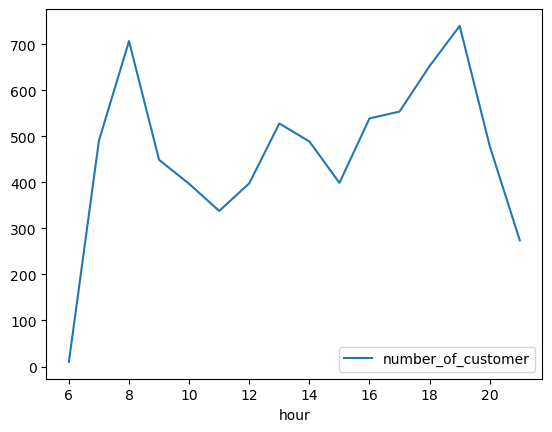

In [16]:
df_time_hourly.plot()


<Axes: ylabel='Density'>

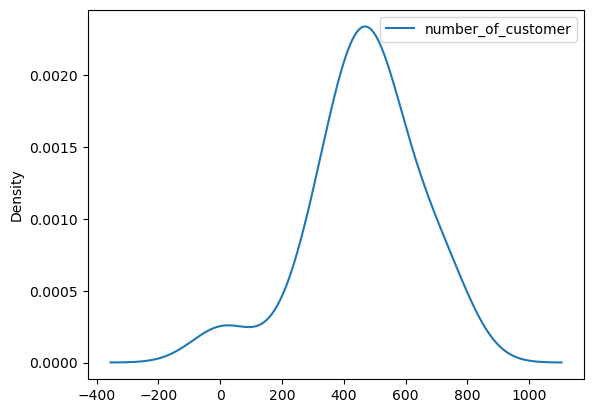

In [17]:
df_time_hourly.plot.kde()


<Axes: xlabel='hour'>

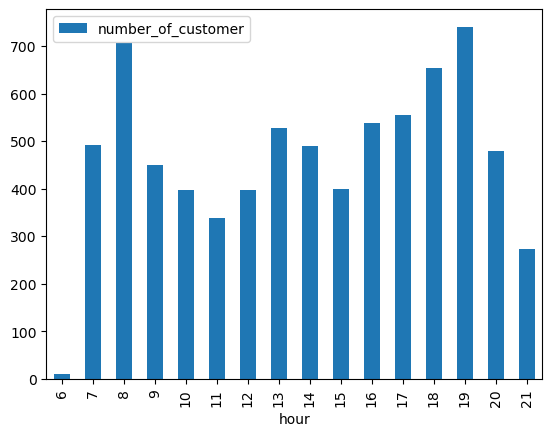

In [18]:
df_time_hourly.plot(kind='bar')


In [19]:
df_time_hourly['number_of_customer'].value_counts().describe()


count    16.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: number_of_customer, dtype: float64

In [20]:
df_hm = df_time.groupby(['hour', 'minute']).sum()


In [21]:
df_hm

number_of_customer
hour minute                    
6    59                      10
7    0                        6
     1                        4
     2                       12
     3                       10
...                         ...
21   45                       9
     46                       5
     47                       9
     48                       1
     49                       4

[874 rows x 1 columns]

In [22]:
df_hm.reset_index()

,hour,minute,number_of_customer
0,6,59,10
1,7,0,6
2,7,1,4
3,7,2,12
4,7,3,10
...,...,...,...
869,21,45,9
870,21,46,5
871,21,47,9
872,21,48,1


In [23]:
df_lunch = pd.merge(df_hm.reset_index(),df_time_hourly.reset_index(),'outer',on='hour')
df_lunch.columns = ['hour','minute','cus_min','cus_hour']

In [24]:
df_lunch['minute_normalized']=(df_lunch['cus_min']/df_lunch['cus_hour']).round(3)


In [25]:
df_lunch

,hour,minute,cus_min,cus_hour,minute_normalized
0,6,59,10,10,1.000
1,7,0,6,491,0.012
2,7,1,4,491,0.008
3,7,2,12,491,0.024
4,7,3,10,491,0.020
...,...,...,...,...,...
869,21,45,9,274,0.033
870,21,46,5,274,0.018
871,21,47,9,274,0.033
872,21,48,1,274,0.004


<Axes: >

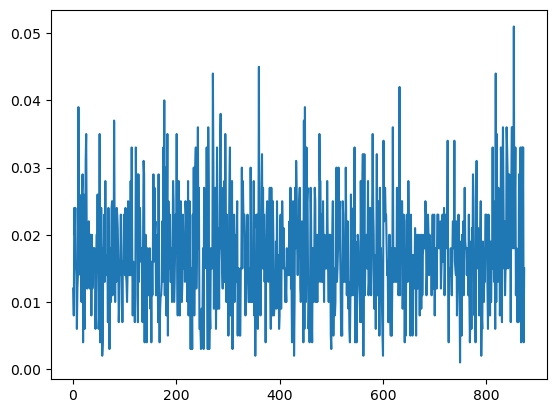

In [26]:
df_lunch['minute_normalized'][1:,].plot()


In [28]:
df_prob = df_time.drop(['hour','minute'],axis=1)
prob = df_prob.groupby('number_of_customer').value_counts()
prob = pd.DataFrame(prob).copy()
prob = prob.reset_index()
prob.columns = ['New_Cus_per_min','Frequency']


In [29]:
prob

,New_Cus_per_min,Frequency
0,1,719
1,2,643
2,3,534
3,4,332
4,5,240
5,6,123
6,7,48
7,8,18
8,9,9
9,11,1


<Axes: >

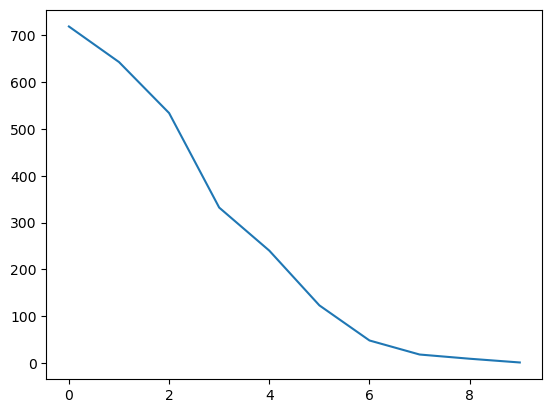

In [30]:
prob['Frequency'].plot()


In [31]:
prob['Prob'] = prob['Frequency']/sum(prob['Frequency'])


In [32]:
prob.to_pickle('Entry_prob')


In [33]:
prob

,New_Cus_per_min,Frequency,Prob
0,1,719,0.269591
1,2,643,0.241095
2,3,534,0.200225
3,4,332,0.124484
4,5,240,0.089989
5,6,123,0.046119
6,7,48,0.017998
7,8,18,0.006749
8,9,9,0.003375
9,11,1,0.000375
